In [23]:
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import os
from pathlib import Path

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

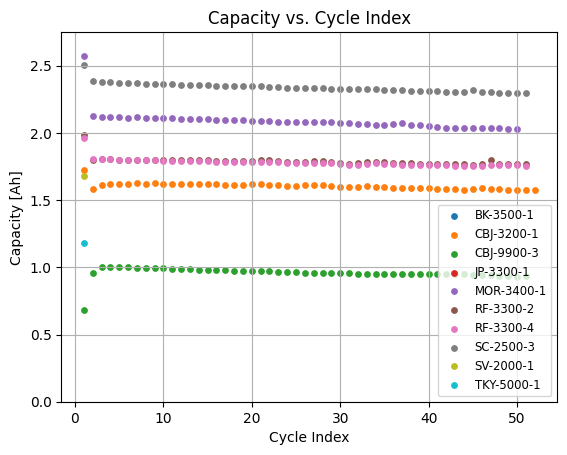

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = os.getcwd()
files = os.listdir(folder_path)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)

cmap = plt.cm.Reds
norm = plt.Normalize(vmin=0, vmax=50)

def filter_data(df):
    filtered_df = df
    filtered_df = filtered_df[filtered_df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    Cycle_index = filtered_df['Cycle Index']
    capacity_data = filtered_df['DChg. Cap.(Ah)']
    
    return Cycle_index, capacity_data

for file in excel_files_sort:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, header=0, sheet_name='cycle')
    
    Cycle_index, capacity_data = filter_data(df)
    
    # Remove the file extension for the label
    label = os.path.splitext(file)[0]
    
    plt.scatter(Cycle_index, capacity_data, s=15, label=label)
    
plt.ylim(0, 2.75)
plt.grid()
plt.xlabel('Cycle Index')
plt.ylabel('Capacity [Ah]')
plt.title('Capacity vs. Cycle Index')
plt.legend(fontsize='small')
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

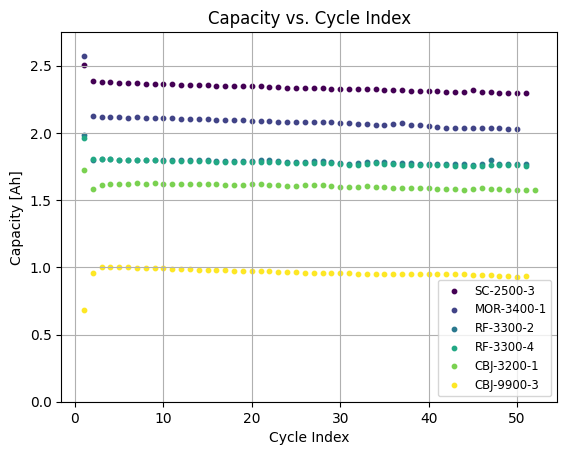

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 현재 작업 디렉토리와 파일 목록 가져오기
folder_path = os.getcwd()
files = os.listdir(folder_path)

# Excel 파일 필터링
excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)

# 데이터 필터링 함수 정의
def filter_data(df):
    filtered_df = df
    filtered_df = filtered_df[filtered_df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    Cycle_index = filtered_df['Cycle Index']
    capacity_data = filtered_df['DChg. Cap.(Ah)']
    
    return Cycle_index, capacity_data

# 각 파일의 데이터를 저장할 사전 생성
data_dict = {}

# 각 파일의 데이터 읽기 및 필터링
for file in excel_files_sort:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, header=0, sheet_name='cycle')
    
    Cycle_index, capacity_data = filter_data(df)
    
    # 파일 확장자를 제거하여 레이블 생성
    label = os.path.splitext(file)[0]
    
    data_dict[label] = (Cycle_index, capacity_data)

# 원하는 순서로 레이블 지정 (여기서는 임의의 순서)
sorted_labels = ['SC-2500-3','MOR-3400-1', 'RF-3300-2', 'RF-3300-4', 'CBJ-3200-1', 'CBJ-9900-3']  # 원하는 순서로 레이블 나열

# 컬러맵 설정
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(sorted_labels)))

# 정렬된 레이블을 사용하여 플롯 생성
for idx, label in enumerate(sorted_labels):
    if label in data_dict:
        Cycle_index, capacity_data = data_dict[label]
        color = colors[idx]
        
        # 전체 점 플롯
        plt.scatter(Cycle_index, capacity_data, s=10, color=color, label=label)

# 플롯 설정
plt.ylim(0, 2.75)
plt.grid()
plt.xlabel('Cycle Index')
plt.ylabel('Capacity [Ah]')
plt.title('Capacity vs. Cycle Index')
plt.legend(fontsize='small')
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

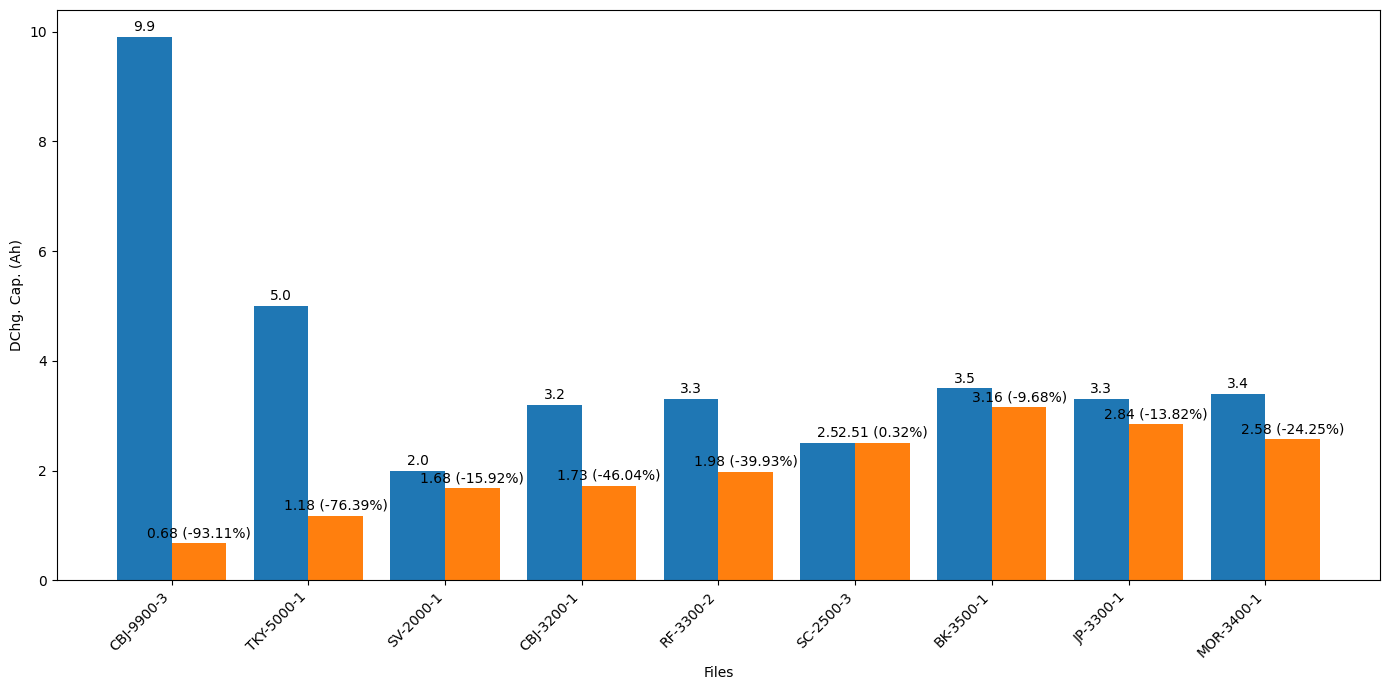

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the folder path where the Excel files are located
folder_path = '/Users/jinhong/Downloads/Amazon cells/Electrochemistry/cycle vs capa'

# List of file names in the desired order
file_names = [
    'CBJ-9900-3.xlsx',
    'TKY-5000-1.xlsx',
    'SV-2000-1.xlsx',
    'CBJ-3200-1.xlsx',
    'RF-3300-2.xlsx',
    'SC-2500-3.xlsx',
    'BK-3500-1.xlsx',
    'JP-3300-1.xlsx',
    'MOR-3400-1.xlsx'
]

# Hardcoded values
hardcoded_values = [9.9, 5.0, 2.0, 3.2, 3.3, 2.5, 3.5, 3.3, 3.4]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Create the bar graph
labels = [os.path.splitext(file_name)[0] for file_name in file_names]  # Use file names as labels
x = range(len(labels))

fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the bars
bar_width = 0.4
ax.bar(x, hardcoded_values, width=bar_width, label='Hardcoded Values', align='center')
ax.bar([p + bar_width for p in x], extracted_values, width=bar_width, label='Extracted Values', align='center')

# Adding labels and title
ax.set_xlabel('Files')
ax.set_ylabel('DChg. Cap. (Ah)')
# ax.set_title('Comparison of Hardcoded and Extracted DChg. Cap. (Ah) Values')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels, rotation=45, ha='right')

# Adding percentage differences above the bars
for i in range(len(labels)):
    difference = ((extracted_values[i] - hardcoded_values[i]) / hardcoded_values[i]) * 100
    ax.text(i, hardcoded_values[i] + 0.05, f'{hardcoded_values[i]}', ha='center', va='bottom')
    ax.text(i + bar_width, extracted_values[i] + 0.05, f'{extracted_values[i]:.2f} ({difference:.2f}%)', ha='center', va='bottom')

# ax.legend()

plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

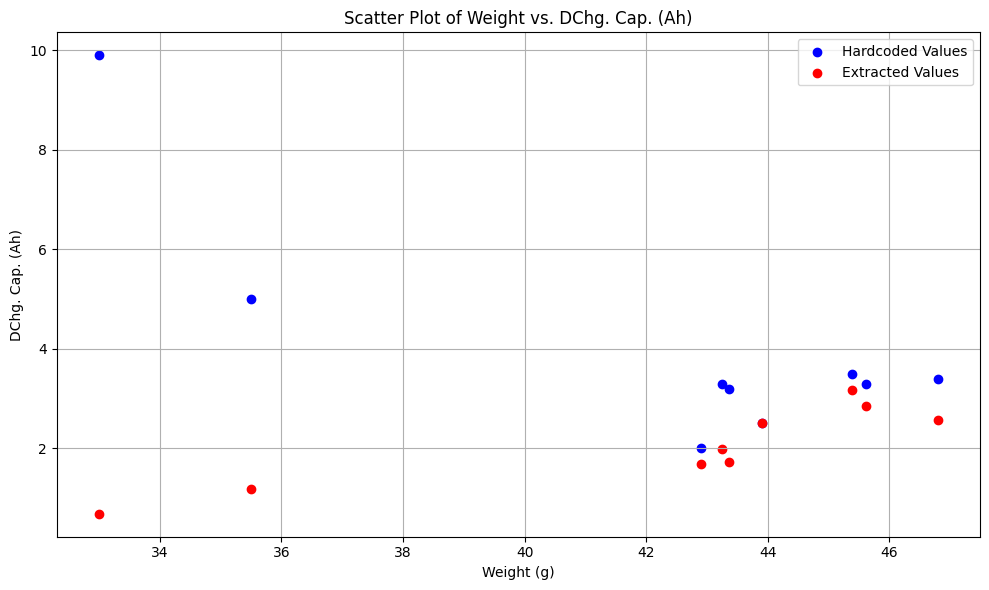

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the folder path where the Excel files are located
folder_path = '/Users/jinhong/Downloads/Amazon cells/Electrochemistry/cycle vs capa'

# List of file names in the desired order
file_names = [
    'CBJ-9900-3.xlsx',
    'TKY-5000-1.xlsx',
    'SV-2000-1.xlsx',
    'CBJ-3200-1.xlsx',
    'RF-3300-2.xlsx',
    'SC-2500-3.xlsx',
    'BK-3500-1.xlsx',
    'JP-3300-1.xlsx',
    'MOR-3400-1.xlsx'
]

# Hardcoded values (expected capacity values)
hardcoded_values = [9.9, 5.0, 2.0, 3.2, 3.3, 2.5, 3.5, 3.3, 3.4]
# Weight values
weight = [32.9975, 35.5, 42.9025, 43.36, 43.24, 43.9, 45.385, 45.62, 46.8]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, hardcoded_values, color='blue', label='Hardcoded Values')
plt.scatter(weight, extracted_values, color='red', label='Extracted Values')

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('DChg. Cap. (Ah)')
plt.title('Scatter Plot of Weight vs. DChg. Cap. (Ah)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

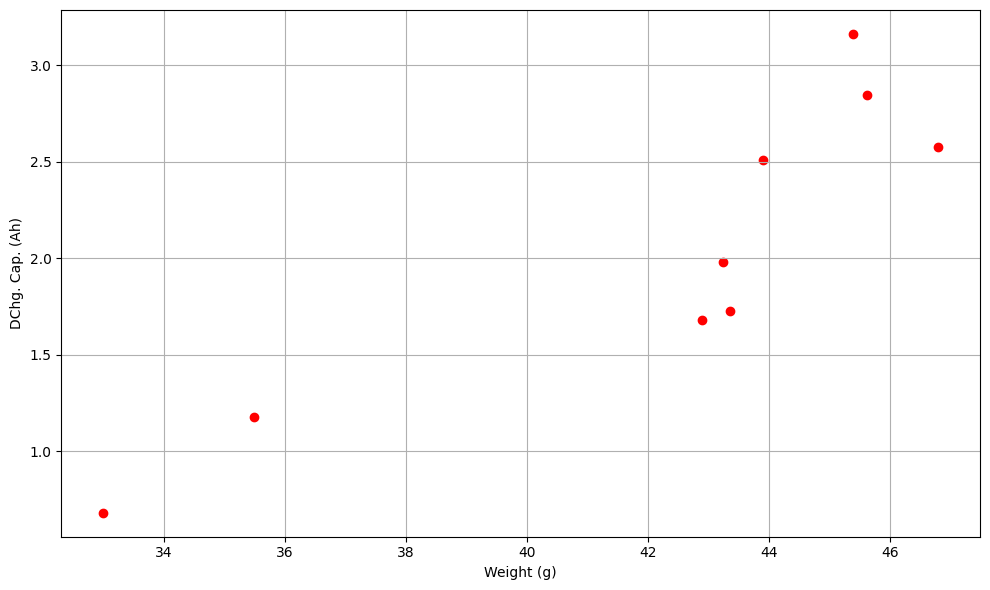

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the folder path where the Excel files are located
folder_path = '/Users/jinhong/Downloads/Amazon cells/Electrochemistry/cycle vs capa'

# List of file names in the desired order
file_names = [
    'CBJ-9900-3.xlsx',
    'TKY-5000-1.xlsx',
    'SV-2000-1.xlsx',
    'CBJ-3200-1.xlsx',
    'RF-3300-2.xlsx',
    'SC-2500-3.xlsx',
    'BK-3500-1.xlsx',
    'JP-3300-1.xlsx',
    'MOR-3400-1.xlsx'
]

# Weight values
weight = [32.9975, 35.5, 42.9025, 43.36, 43.24, 43.9, 45.385, 45.62, 46.8]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, extracted_values, color='red', label='Extracted Values')

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('DChg. Cap. (Ah)')
# plt.title('Scatter Plot of Weight vs. DChg. Cap. (Ah)')
# plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()